<a href="https://colab.research.google.com/github/kelvinlo-yuhsiang/firstproject/blob/main/210925_%E4%BD%9C%E6%A5%AD_Lab2_%E7%AC%AC%E4%B8%80%E5%80%8B%E8%81%96%E7%9B%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#技術分析

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
#!./configure --prefix=/usr/local
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

import numpy as np
import pandas as pd
import talib
from talib import MA_Type
from talib import abstract

--2021-09-26 07:07:36--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-09-26 07:07:37--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-09-26 07:07:37--  https://versaweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving versaweb.dl

#第二個聖盃：台指期沖沖沖

In [ ]:
#!wget -O /content/download.7z https://drive.google.com/u/0/uc?id=1LS2-trOX-eT7nn8-T2ytaJBKNMN6dQiD&export=download
!wget -O /content/today_future_all.csv https://drive.google.com/u/0/uc?id=1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF&export=download

--2021-09-26 07:09:35--  https://drive.google.com/u/0/uc?id=1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF
Resolving drive.google.com (drive.google.com)... 173.194.194.138, 173.194.194.101, 173.194.194.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.194.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o20tmbtkst4g3471eooodqf95r80upqc/1632640125000/01280177523055167044/*/1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF [following]
--2021-09-26 07:09:36--  https://doc-0c-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o20tmbtkst4g3471eooodqf95r80upqc/1632640125000/01280177523055167044/*/1WaeiADEc_s_3IoB6QXnBDKMS3YwQh7JF
Resolving doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs.googleusercontent.com)... 142.250.128.132, 2607:f8b0:4001:c32::84
Connecting to doc-0c-a0-docs.googleusercontent.com (doc-0c-a0-docs.googleusercontent.co

In [ ]:
import pandas as pd
import numpy as np
import datetime
df_future=pd.read_csv('/content/today_future_all.csv', encoding = "utf-8")
print(df_future.head())

                         Date         合約  close
0  2021-01-04_11:13:06.542000  MXF202102  14875
1  2021-01-04_11:14:00.363000  MXF202102  14876
2  2021-01-04_11:15:00.191000  MXF202102  14881
3  2021-01-04_11:16:00.200000  MXF202102  14885
4  2021-01-04_11:17:00.006000  MXF202102  14881


#沖沖沖主程式(修改主程式，增設參數parameterN)
> ###參數測試1~30,最佳參數2 (約20min)
> ###參數測試1~100,最佳參數63 (約一小時)





In [ ]:
def call_function(flag, df, parameterN):
    #print("inside call function:",df.index)
    df = df.reset_index(drop=True)

    trade = 0
    trade_price = 0
    total_time = 0
    TOTAL_GETMONEY = 0
    win_time = 0
    
    price_array = np.array(df["close"], dtype=float)
    df["SMA_7"] = np.round( talib.SMA(price_array, flag.SMA_parameter),2 )  # close 代進WMA方法做計算
    df["SMA_20"] = np.round( talib.SMA(price_array, flag.SMA_parameter * parameterN ),2 )  # close 代進SMA方法做計算
    # H_line,M_line,L_line=talib.BBANDS(price_array, timeperiod=10, nbdevup=3, nbdevdn=3, matype=0)
    # df['H_line']=H_line
    # df['L_line']=L_line
    # df['H_line-L_line']=H_line-L_line
    #df["DIF"], df["DEA"], df["MACD"] = np.round( talib.MACD(price_array, fastperiod=12*5, slowperiod=26*5, signalperiod=9*5),2 )
    #df["DIF"], df["DEA"], df["MACD"] = np.round( talib.MACD(price_array, fastperiod=12*flag.MACD_parameter, slowperiod=26*flag.MACD_parameter, signalperiod=9*flag.MACD_parameter),2 )
    #df["DIF_MACD"] = df["DIF"] - df["MACD"]
    #df["RSI_7"] = talib.RSI(price_array,timeperiod=5*20)
    #df["RSI_20"] = talib.RSI(price_array,timeperiod=10*20)
    list_多空交易 = ["" for i in range(0, len(df.index))]
    list_持倉 = ["" for i in range(0, len(df.index))]
    list_該筆交易損益 = ["" for i in range(0, len(df.index))]
    list_總交易損益 = [0 for i in range(0, len(df.index))]
    # print(df.info(memory_usage='deep'))
    # print(list_多空交易)
    # print(df)

    # 交易
    for index, row in df.iterrows():

        # if (np.isnan( df['DIF'].iloc[i]) == False) and (  int(df['Date'].iloc[i][11:13]) >= 8 ):
        # print('row["Date"][11:13])：'+row['Date'][11:13])
        # if (index <= 10):
        if np.isnan(row["SMA_20"]):
            # print("前幾筆不下單")
            pass

        else:
            NOW_TIME = row['Date']
            NOW_MONTH = int(NOW_TIME[5:7])
            NOW_DAY = int(NOW_TIME[8:10])
            NOW_HOUR = int(NOW_TIME[11:13])
            NOW_MINI = int(NOW_TIME[14:16])
            NOW_SEC = int(NOW_TIME[17:19])
            NOW_WEEK = datetime.datetime.strptime(NOW_TIME[:10], "%Y-%m-%d").weekday()


            ########################################################順勢###########################################
            if trade == 0:
                if (
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    #or (NOW_WEEK == 4 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期五自動平倉
                    ):
                    list_多空交易[index] = "要收盤了，不下單"
                else:
                    if (
                        - flag.SMA_thres <= (row['SMA_7'] - row['SMA_20']) <= flag.SMA_thres
                        ):
                        list_多空交易[index] = "盤整盤，準備逆勢下單"
                        #trade_forward_reverse = "reverse"
                        trade_forward_reverse = "forward"
                    else:
                        list_多空交易[index] = "準備順勢下單"
                        trade_forward_reverse = "forward"

                    trade_already = False
                    # if df['DIF'].iloc[i] >= df['DIF'].iloc[i-1] and df['price'].iloc[i] >= df['SMA_7'].iloc[i] and df['price'].iloc[i] >= df['SMA_20'].iloc[i]:
                    # if (row['price']>=price_old) and (row['price'] >= row['SMA_7']) and (row['price'] >= row['SMA_20']) and (row['H_line']-row['L_line'] >=flag.stoploss):

                    if (
                        row["close"] >= (row["SMA_7"] + flag.stoploss) 
                        and row["close"] >= (row["SMA_20"] + flag.stoploss)

                        #row['DIF'] > row['MACD']
                        #row['DIF_MACD'] > 0
                        #row['MACD'] > 0
                        
                        #and ( row['DIF'] >= flag.MACD_thres or row['DIF'] <= (0-flag.MACD_thres) )
                        #and ( row['MACD'] >= flag.MACD_thres or row['MACD'] <= (0-flag.MACD_thres) )

                        #row['DIF'] > flag.DIF_thres and row['MACD'] > flag.DIF_thres

                        #row['RSI_7'] > row['RSI_20']

                    ):
                        # if row['MACD'] >= new_threshold:
                        # if row['price'] >= row['H_line'] + new_threshold:
                        # if (row['MACD'] >= new_threshold) and (row['H_line']-row['L_line'] >=30):
                        trade = 1
                        trade_price = row["close"]
                        list_持倉[index] = '1'
                        if trade_forward_reverse == "forward":
                            list_多空交易[index] = '順勢做多'
                        else:
                            list_多空交易[index] = '逆勢做空'
                        
    
                    # elif row['MACD'] <= -(new_threshold):
                    # elif row['price'] <= row['L_line'] - new_threshold:
                    # elif (row['MACD'] <= -(new_threshold)) and (row['H_line']-row['L_line'] >=30):
                    # elif (row['price'] <= (row['SMA_7']-flag.stoploss)) and (row['price'] <= (row['SMA_20']-flag.stoploss)) and (row['SMA_7']>=SMA_old2):
                    # elif (row['price'] <= (row['SMA_7']-flag.stoploss)):
                    elif (
                        row["close"] <= (row["SMA_7"] - flag.stoploss) 
                        and row["close"] <= (row["SMA_20"] - flag.stoploss)

                        #row['DIF'] < row['MACD']
                        #row['DIF_MACD'] < 0
                        #row['MACD'] < 0
                        
                        #and ( row['DIF'] >= flag.MACD_thres or row['DIF'] <= (0-flag.MACD_thres) )
                        #and ( row['MACD'] >= flag.MACD_thres or row['MACD'] <= (0-flag.MACD_thres) )

                        #row['DIF'] < (0-flag.DIF_thres) and row['MACD'] < (0-flag.DIF_thres)

                        #row['RSI_7'] < row['RSI_20']
                    ):
                        trade = -1
                        trade_price = row["close"]
                        list_持倉[index]='-1'
                        list_多空交易[index]='順勢做空'
                        

            elif trade == 1:
                if not trade_already:
                    if trade_forward_reverse == "forward":
                        list_多空交易[index] = '順勢做多'
                    else:
                        list_多空交易[index] = '逆勢做空'
                else:
                    list_多空交易[index] = "空手"

                # if df['DIF'].iloc[i] <= df['DIF'].iloc[i-1] or df['price'].iloc[i] <= df['SMA_7'].iloc[i] or df['price'].iloc[i] <= df['SMA_20'].iloc[i]:
                # if row['price'] <= (row['SMA_7']-10) or row['price'] <= (row['SMA_20']-10):
                # if ( row['price'] <= (row['SMA_7']-flag.stoploss) or row['price'] <= (row['SMA_20']-flag.stoploss) ) and (trade_already==False):
                if ((
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    or row["close"] < (row["SMA_7"] + flag.stoploss) 
                    or  row["close"] < (row["SMA_20"] + flag.stoploss)
                    #or row['DIF_MACD'] < 0
                    or row["close"] - trade_price <= flag.stoploss
                ) and (not trade_already) and ( trade_forward_reverse == "forward") 
                ) or ((
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    or row["close"] < (row["SMA_7"] + flag.stoploss) 
                    or  row["close"] < (row["SMA_20"] + flag.stoploss)
                    #or row['DIF_MACD'] < 0
                    or trade_price - row["close"] <= flag.stoploss
                ) and (not trade_already) and ( trade_forward_reverse == "reverse")
                ): 
                    #or (row["price"] >= (trade_price + flag.stoploss * 1))

                    trade_already = True
                    if trade_forward_reverse == "forward":
                        if (row['close'] - trade_price) >= 0:
                            list_持倉[index]='+0'
                            list_多空交易[index]='賺錢'
                            win_time = win_time+1
                        else:
                            list_持倉[index]='-0'
                            list_多空交易[index]='賠錢'
                        list_該筆交易損益[index]= row['close'] - trade_price
                    else:
                        if (row['close'] - trade_price) >= 0:
                            list_持倉[index]='-0'
                            list_多空交易[index]='賠錢'
                        else:
                            list_持倉[index]='+0'
                            list_多空交易[index]='賺錢'
                            win_time = win_time+1
                        list_該筆交易損益[index]= trade_price - row['close']




                    TOTAL_GETMONEY = TOTAL_GETMONEY + list_該筆交易損益[index]

                    total_time = total_time + 1
                    

                    
                # 價格有回來才可再下單
                if (row["close"] <= (row["SMA_7"])) and (trade_already):
                #if (row['DIF'] <= row['MACD']) and (trade_already) :
                #if row['MACD']<0 and trade_already :
                #if row['DIF_MACD'] < 0 and (trade_already) :
                #if (row['RSI_7'] <= row['RSI_20']) and (trade_already) :
                    # if (row['price'] <= (row['SMA_7']-0) or row['price'] <= (row['SMA_20']-0) ) and (trade_already==True):
                    trade = 0

            elif trade == -1:
                # list_多空交易[index]='做空'
                # 逆勢
                if not trade_already:
                    if trade_forward_reverse == "forward":
                        list_多空交易[index] = '順勢做空'
                    else:
                        list_多空交易[index] = '逆勢做多'
                else:
                    list_多空交易[index] = "空手"
                # if ( row['price'] >= (row['SMA_7']+flag.stoploss) or row['price'] >= (row['SMA_20']+flag.stoploss) ) and (trade_already==False):
                if ((
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    or row["close"] > (row["SMA_7"] - flag.stoploss) 
                    or row["close"] > (row["SMA_20"] - flag.stoploss)
                    #or row['DIF_MACD'] > 0
                    or trade_price - row["close"] <= flag.stoploss
                ) and (not trade_already) and (trade_forward_reverse == "forward")
                ) or ((
                    (NOW_WEEK == 5 and NOW_HOUR == 4 and NOW_MINI >= 55) #星期六自動平倉
                    or row["close"] > (row["SMA_7"] - flag.stoploss) 
                    or row["close"] > (row["SMA_20"] - flag.stoploss)
                    #or row['DIF_MACD'] > 0
                    or row["close"]- trade_price <= flag.stoploss
                ) and (not trade_already) and (trade_forward_reverse == "reverse")
                ):


                    trade_already = True
                    if trade_forward_reverse == "forward":
                        if (trade_price - row['close']) >= 0:
                            list_持倉[index]='+0'
                            list_多空交易[index]='賺錢'
                            win_time = win_time+1
                        else:
                            list_持倉[index]='-0'
                            list_多空交易[index]='賠錢'
                        list_該筆交易損益[index]= trade_price - row['close']
                    else:
                        if (trade_price - row['price']) >= 0:
                            list_持倉[index]='-0'
                            list_多空交易[index]='賠錢'
                        else:
                            list_持倉[index]='+0'
                            list_多空交易[index]='賺錢'
                            win_time = win_time+1
                        list_該筆交易損益[index]= row['price'] - trade_price
       


                    TOTAL_GETMONEY = TOTAL_GETMONEY + list_該筆交易損益[index]

                    total_time = total_time + 1
                    # print('TOTAL_GETMONEY'+str(TOTAL_GETMONEY))

                    
                # 價格有回來才可再下單
                if (row["close"] >= (row["SMA_7"])) and (trade_already):
                #if (row['DIF'] >= row['MACD']) and (trade_already) :
                #if row['DIF_MACD'] > 0 and (trade_already) :
                #if row['MACD'] > 0 and trade_already :
                #if (row['RSI_7'] >= row['RSI_20']) and (trade_already) :
                    # if (row['price'] >= (row['SMA_7']+0) or row['price'] >= (row['SMA_20']+0) ) and (trade_already==True):
                    trade = 0
            ########################################################順勢###########################################
    
            list_總交易損益[index] = TOTAL_GETMONEY
            
    try:
        win_rate = int(win_time / total_time * 100)
    except:
        print("沒事，win_rate=0")
        win_rate = 0
    
    df["多空交易"] = list_多空交易
    df["持倉"] = list_持倉
    df["該筆交易損益"] = list_該筆交易損益
    df["總交易損益"] = list_總交易損益
    return flag, df, trade_price, total_time, win_rate

class Flag:
  def __init__(self):
    self.stoploss = -100        
    self.SMA_thres = 1
    self.SMA_parameter = 100
            
flag = Flag()


交易損益 = dict()
最大值 = []

'''
for parameterN in range(1,101):
  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)
  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN
  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])


print(交易損益)
# {2048: 1, 3306: 2, 2333: 3, 423: 4, 673: 5, 779: 6, 1344: 7, 1832: 8, 2574: 9, 2229: 10, 2301: 11, 2127: 12, 2033: 13, 2737: 14, 2184: 15, 1806: 16, 1448: 17, 1607: 18, 1541: 19, 1649: 20, 1975: 21, 1515: 22, 1547: 23, 1669: 24, 1766: 25, 2159: 26, 1886: 27, 2136: 28, 2422: 29, 2375: 30, 2540: 31, 2395: 32, 2538: 33, 2520: 34, 2310: 35, 2291: 36, 2472: 37, 2609: 38, 3217: 39, 2993: 40, 2991: 41, 2879: 42, 2578: 43, 2820: 44, 3026: 45, 2129: 46, 2157: 47, 2411: 48, 2774: 49, 3090: 50, 3130: 51, 3058: 52, 2940: 53, 3352: 54, 2834: 55, 3371: 56, 3187: 57, 3030: 58, 2968: 59, 3331: 60, 3333: 61, 3472: 62, 3649: 63, 3296: 64, 3139: 65, 2916: 66, 2608: 67, 2721: 68, 2450: 69, 2785: 70, 2965: 71, 2665: 72, 2239: 73, 2196: 74, 1922: 75, 1461: 76, 1776: 77, 1454: 78, 1317: 79, 1564: 80, 1490: 81, 1694: 82, 2478: 83, 2767: 84, 3015: 85, 2914: 86, 2892: 87, 2610: 88, 2072: 89, 1850: 90, 2045: 91, 1963: 92, 1996: 93, 1672: 94, 1621: 95, 1232: 96, 1197: 97, 1426: 98, 1743: 99, 1728: 100}
print(最大值)
# [2048, 3306, 2333, 423, 673, 779, 1344, 1832, 2574, 2229, 2301, 2127, 2033, 2737, 2184, 1806, 1448, 1607, 1541, 1649, 1975, 1515, 1547, 1669, 1766, 2159, 1886, 2136, 2422, 2375, 2540, 2395, 2538, 2520, 2310, 2291, 2472, 2609, 3217, 2993, 2991, 2879, 2578, 2820, 3026, 2129, 2157, 2411, 2774, 3090, 3130, 3058, 2940, 3352, 2834, 3371, 3187, 3030, 2968, 3331, 3333, 3472, 3649, 3296, 3139, 2916, 2608, 2721, 2450, 2785, 2965, 2665, 2239, 2196, 1922, 1461, 1776, 1454, 1317, 1564, 1490, 1694, 2478, 2767, 3015, 2914, 2892, 2610, 2072, 1850, 2045, 1963, 1996, 1672, 1621, 1232, 1197, 1426, 1743, 1728]
print(max(最大值),交易損益[max(最大值)])
# 3649 63

flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future,交易損益[max(最大值)])
print(df_future.tail())
'''

"\nfor parameterN in range(1,101):\n  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)\n  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN\n  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])\n\n\nprint(交易損益)\n# {2048: 1, 3306: 2, 2333: 3, 423: 4, 673: 5, 779: 6, 1344: 7, 1832: 8, 2574: 9, 2229: 10, 2301: 11, 2127: 12, 2033: 13, 2737: 14, 2184: 15, 1806: 16, 1448: 17, 1607: 18, 1541: 19, 1649: 20, 1975: 21, 1515: 22, 1547: 23, 1669: 24, 1766: 25, 2159: 26, 1886: 27, 2136: 28, 2422: 29, 2375: 30, 2540: 31, 2395: 32, 2538: 33, 2520: 34, 2310: 35, 2291: 36, 2472: 37, 2609: 38, 3217: 39, 2993: 40, 2991: 41, 2879: 42, 2578: 43, 2820: 44, 3026: 45, 2129: 46, 2157: 47, 2411: 48, 2774: 49, 3090: 50, 3130: 51, 3058: 52, 2940: 53, 3352: 54, 2834: 55, 3371: 56, 3187: 57, 3030: 58, 2968: 59, 3331: 60, 3333: 61, 3472: 62, 3649: 63, 3296: 64, 3139: 65, 2916: 66, 2608: 67, 2721: 68, 2450: 69, 2785: 70, 2965: 71, 2665: 72, 2239: 73

# <2的參數測試 0.1~1.9,最佳參數1.1

In [ ]:
'''
import numpy as np

for parameterN in [round(i,3) for i in np.arange(0.1, 2, 0.1, dtype=np.float32)]:
  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)
  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN
  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])


print(交易損益)
# {2048: 1.0, 2323: 0.1, 1551: 0.2, 2099: 0.3, 2683: 0.4, 2707: 0.5, 2255: 0.6, 1887: 0.7, 1144: 0.8, 1780: 0.9, 3759: 1.1, 3691: 1.2, 3415: 1.3, 2981: 1.4, 2956: 1.5, 2574: 1.6, 2692: 1.7, 2959: 1.8, 3299: 1.9}
print(最大值)
# [2048, 2323, 1551, 2099, 2683, 2707, 2255, 1887, 1144, 1780, 2048, 3759, 3691, 3415, 2981, 2956, 2574, 2692, 2959, 3299]
print(max(最大值),交易損益[max(最大值)])
# 3759, 1.1
'''

"\nimport numpy as np\n\nfor parameterN in [round(i,3) for i in np.arange(0.1, 2, 0.1, dtype=np.float32)]:\n  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)\n  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN\n  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])\n\n\nprint(交易損益)\n# {2048: 1.0, 2323: 0.1, 1551: 0.2, 2099: 0.3, 2683: 0.4, 2707: 0.5, 2255: 0.6, 1887: 0.7, 1144: 0.8, 1780: 0.9, 3759: 1.1, 3691: 1.2, 3415: 1.3, 2981: 1.4, 2956: 1.5, 2574: 1.6, 2692: 1.7, 2959: 1.8, 3299: 1.9}\nprint(最大值)\n# [2048, 2323, 1551, 2099, 2683, 2707, 2255, 1887, 1144, 1780, 2048, 3759, 3691, 3415, 2981, 2956, 2574, 2692, 2959, 3299]\nprint(max(最大值),交易損益[max(最大值)])\n# 3759, 1.1\n"

# 參數測試 1.11~1.19, 最佳參數1.12 &1.13



In [ ]:
'''
for parameterN in [round(i,4) for i in np.arange(1.11, 1.20, 0.01, dtype=np.float32)]:
  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)
  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN
  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])

print(交易損益)
print(最大值)
print(max(最大值),交易損益[max(最大值)])

#{2048: 1.0, 2323: 0.1, 1551: 0.2, 2099: 0.3, 2683: 0.4, 2707: 0.5, 2255: 0.6, 1887: 0.7, 1144: 0.8, 1780: 0.9, 3759: 1.1, 3691: 1.2, 3415: 1.3, 2981: 1.4, 2956: 1.5, 2574: 1.6, 2692: 1.7, 2959: 1.8, 3299: 1.9, 3790: 1.11, 3917: 1.13, 3763: 1.14, 3832: 1.15, 3829: 1.16, 3814: 1.17, 3617: 1.18, 3683: 1.19}
#[2048, 2323, 1551, 2099, 2683, 2707, 2255, 1887, 1144, 1780, 2048, 3759, 3691, 3415, 2981, 2956, 2574, 2692, 2959, 3299, 3790, 3917, 3917, 3763, 3832, 3829, 3814, 3617, 3683]
#3917 1.13
'''

"\nfor parameterN in [round(i,4) for i in np.arange(1.11, 1.20, 0.01, dtype=np.float32)]:\n  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)\n  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN\n  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])\n\nprint(交易損益)\nprint(最大值)\nprint(max(最大值),交易損益[max(最大值)])\n\n#{2048: 1.0, 2323: 0.1, 1551: 0.2, 2099: 0.3, 2683: 0.4, 2707: 0.5, 2255: 0.6, 1887: 0.7, 1144: 0.8, 1780: 0.9, 3759: 1.1, 3691: 1.2, 3415: 1.3, 2981: 1.4, 2956: 1.5, 2574: 1.6, 2692: 1.7, 2959: 1.8, 3299: 1.9, 3790: 1.11, 3917: 1.13, 3763: 1.14, 3832: 1.15, 3829: 1.16, 3814: 1.17, 3617: 1.18, 3683: 1.19}\n#[2048, 2323, 1551, 2099, 2683, 2707, 2255, 1887, 1144, 1780, 2048, 3759, 3691, 3415, 2981, 2956, 2574, 2692, 2959, 3299, 3790, 3917, 3917, 3763, 3832, 3829, 3814, 3617, 3683]\n#3917 1.13\n"

# 參數測試 1.121~1.129, 
> 1.12~1.13都可以得到最佳總交易損益(操作時間5min18sec)



In [ ]:
'''
for parameterN in [round(i,4) for i in np.arange(1.121, 1.130, 0.001, dtype=np.float32)]:
  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)
  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN
  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])

print(交易損益)
print(最大值)
print(max(最大值),交易損益[max(最大值)])

#{3917: 1.129}
#[3917, 3917, 3917, 3917, 3917, 3917, 3917, 3917, 3917]
#3917 1.129
'''

"\nfor parameterN in [round(i,4) for i in np.arange(1.121, 1.130, 0.001, dtype=np.float32)]:\n  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)\n  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN\n  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])\n\nprint(交易損益)\nprint(最大值)\nprint(max(最大值),交易損益[max(最大值)])\n\n#{3917: 1.129}\n#[3917, 3917, 3917, 3917, 3917, 3917, 3917, 3917, 3917]\n#3917 1.129\n"

# 參數測試 62.1~64.0,最佳參數63.2

> 20個參數~12min



In [ ]:
'''
import numpy as np

for parameterN in [round(i,3) for i in np.arange(62.1, 64.1, 0.1, dtype=np.float32)]:
  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)
  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN
  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])


print(交易損益)
# {2048: 1, 3306: 2, 2333: 3, 423: 4, 673: 5, 779: 6, 1344: 7, 1832: 8, 2574: 9, 2229: 10, 2301: 11, 2127: 12, 2033: 13, 2737: 14, 2184: 15, 1806: 16, 1448: 17, 1607: 18, 1541: 19, 1649: 20, 1975: 21, 1515: 22, 1547: 23, 1669: 24, 1766: 25, 2159: 26, 1886: 27, 2136: 28, 2422: 29, 2375: 30, 2540: 31, 2395: 32, 2538: 33, 2520: 34, 2310: 35, 2291: 36, 2472: 37, 2609: 38, 3217: 39, 2993: 40, 2991: 41, 2879: 42, 2578: 43, 2820: 44, 3026: 45, 2129: 46, 2157: 47, 2411: 48, 2774: 49, 3090: 50, 3130: 51, 3058: 52, 2940: 53, 3352: 54, 2834: 55, 3371: 56, 3187: 57, 3030: 58, 2968: 59, 3331: 60, 3333: 61, 3472: 62, 3649: 63.0, 3296: 64.0, 3139: 65, 2916: 66, 2608: 67, 2721: 68, 2450: 69, 2785: 70, 2965: 71, 2665: 72, 2239: 73, 2196: 74, 1922: 75, 1461: 76, 1776: 77, 1454: 78, 1317: 79, 1564: 80, 1490: 81, 1694: 82, 2478: 83, 2767: 84, 3015: 85, 2914: 86, 2892: 87, 2610: 88, 2072: 89, 1850: 90, 2045: 91, 1963: 92, 1996: 93, 1672: 94, 1621: 95, 1232: 96, 1197: 97, 1426: 98, 1743: 99, 1728: 100, 3452: 62.1, 3324: 62.3, 3666: 62.4, 3597: 62.5, 3619: 62.6, 3623: 62.7, 3612: 62.8, 3627: 62.9, 3657: 63.1, 3668: 63.2, 3344: 63.3, 3339: 63.4, 3319: 63.5, 3312: 63.6, 3321: 63.7, 3325: 63.8, 3337: 63.9}
print(最大值)
# [2048, 3306, 2333, 423, 673, 779, 1344, 1832, 2574, 2229, 2301, 2127, 2033, 2737, 2184, 1806, 1448, 1607, 1541, 1649, 1975, 1515, 1547, 1669, 1766, 2159, 1886, 2136, 2422, 2375, 2540, 2395, 2538, 2520, 2310, 2291, 2472, 2609, 3217, 2993, 2991, 2879, 2578, 2820, 3026, 2129, 2157, 2411, 2774, 3090, 3130, 3058, 2940, 3352, 2834, 3371, 3187, 3030, 2968, 3331, 3333, 3472, 3649, 3296, 3139, 2916, 2608, 2721, 2450, 2785, 2965, 2665, 2239, 2196, 1922, 1461, 1776, 1454, 1317, 1564, 1490, 1694, 2478, 2767, 3015, 2914, 2892, 2610, 2072, 1850, 2045, 1963, 1996, 1672, 1621, 1232, 1197, 1426, 1743, 1728, 3452, 3296, 3324, 3666, 3597, 3619, 3623, 3612, 3627, 3649, 3657, 3668, 3344, 3339, 3319, 3312, 3321, 3325, 3337, 3296]
print(max(最大值),交易損益[max(最大值)])
# 3668 63.2
'''

"\nimport numpy as np\n\nfor parameterN in [round(i,3) for i in np.arange(62.1, 64.1, 0.1, dtype=np.float32)]:\n  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)\n  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN\n  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])\n\n\nprint(交易損益)\n# {2048: 1, 3306: 2, 2333: 3, 423: 4, 673: 5, 779: 6, 1344: 7, 1832: 8, 2574: 9, 2229: 10, 2301: 11, 2127: 12, 2033: 13, 2737: 14, 2184: 15, 1806: 16, 1448: 17, 1607: 18, 1541: 19, 1649: 20, 1975: 21, 1515: 22, 1547: 23, 1669: 24, 1766: 25, 2159: 26, 1886: 27, 2136: 28, 2422: 29, 2375: 30, 2540: 31, 2395: 32, 2538: 33, 2520: 34, 2310: 35, 2291: 36, 2472: 37, 2609: 38, 3217: 39, 2993: 40, 2991: 41, 2879: 42, 2578: 43, 2820: 44, 3026: 45, 2129: 46, 2157: 47, 2411: 48, 2774: 49, 3090: 50, 3130: 51, 3058: 52, 2940: 53, 3352: 54, 2834: 55, 3371: 56, 3187: 57, 3030: 58, 2968: 59, 3331: 60, 3333: 61, 3472: 62, 3649: 63.0, 3296: 64.0, 3139: 65

# 參數測試 63.11~63.31,最佳參數63.21

> 20個參數~12min



In [ ]:
'''
for parameterN in [round(i,4) for i in np.arange(63.11, 63.31, 0.01, dtype=np.float32)]:
  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)
  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN
  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])

print(交易損益)
print(最大值)
print(max(最大值),交易損益[max(最大值)])
'''

'''
{2048: 1, 3306: 2, 2333: 3, 423: 4, 673: 5, 779: 6, 1344: 7, 1832: 8, 2574: 9, 2229: 10, 2301: 11, 2127: 12, 2033: 13, 2737: 14, 2184: 15, 1806: 16, 1448: 17, 1607: 18, 1541: 19, 1649: 20, 1975: 21, 1515: 22, 1547: 23, 1669: 24, 1766: 25, 2159: 26, 1886: 27, 2136: 28, 2422: 29, 2375: 30, 2540: 31, 2395: 32, 2538: 33, 2520: 34, 2310: 35, 2291: 36, 2472: 37, 2609: 38, 3217: 39, 2993: 40, 2991: 41, 2879: 42, 2578: 43, 2820: 44, 3026: 45, 2129: 46, 2157: 47, 2411: 48, 2774: 49, 3090: 50, 3130: 51, 3058: 52, 2940: 53, 3352: 54, 2834: 55, 3371: 56, 3187: 57, 3030: 58, 2968: 59, 3331: 60, 3333: 61, 3472: 62, 3649: 63.0, 3296: 64.0, 3139: 65, 2916: 66, 2608: 67, 2721: 68, 2450: 69, 2785: 70, 2965: 71, 2665: 72, 2239: 73, 2196: 74, 1922: 75, 1461: 76, 1776: 77, 1454: 78, 1317: 79, 1564: 80, 1490: 81, 1694: 82, 2478: 83, 2767: 84, 3015: 85, 2914: 86, 2892: 87, 2610: 88, 2072: 89, 1850: 90, 2045: 91, 1963: 92, 1996: 93, 1672: 94, 1621: 95, 1232: 96, 1197: 97, 1426: 98, 1743: 99, 1728: 100, 3452: 62.1, 3324: 62.3, 3666: 63.19, 3597: 62.5, 3619: 62.6, 3623: 62.7, 3612: 62.8, 3627: 62.9, 3657: 63.1, 3668: 63.21, 3344: 63.3, 3339: 63.4, 3319: 63.5, 3312: 63.6, 3321: 63.7, 3325: 63.8, 3337: 63.9, 3658: 63.12, 3662: 63.16, 3378: 63.23, 3379: 63.24, 3332: 63.26, 3334: 63.28, 3349: 63.31}
[2048, 3306, 2333, 423, 673, 779, 1344, 1832, 2574, 2229, 2301, 2127, 2033, 2737, 2184, 1806, 1448, 1607, 1541, 1649, 1975, 1515, 1547, 1669, 1766, 2159, 1886, 2136, 2422, 2375, 2540, 2395, 2538, 2520, 2310, 2291, 2472, 2609, 3217, 2993, 2991, 2879, 2578, 2820, 3026, 2129, 2157, 2411, 2774, 3090, 3130, 3058, 2940, 3352, 2834, 3371, 3187, 3030, 2968, 3331, 3333, 3472, 3649, 3296, 3139, 2916, 2608, 2721, 2450, 2785, 2965, 2665, 2239, 2196, 1922, 1461, 1776, 1454, 1317, 1564, 1490, 1694, 2478, 2767, 3015, 2914, 2892, 2610, 2072, 1850, 2045, 1963, 1996, 1672, 1621, 1232, 1197, 1426, 1743, 1728, 3452, 3296, 3324, 3666, 3597, 3619, 3623, 3612, 3627, 3649, 3657, 3668, 3344, 3339, 3319, 3312, 3321, 3325, 3337, 3296, 3658, 3658, 3662, 3662, 3662, 3662, 3666, 3666, 3666, 3668, 3668, 3378, 3378, 3379, 3332, 3332, 3334, 3334, 3344, 3344, 3349]
3668 63.21
'''

'\n{2048: 1, 3306: 2, 2333: 3, 423: 4, 673: 5, 779: 6, 1344: 7, 1832: 8, 2574: 9, 2229: 10, 2301: 11, 2127: 12, 2033: 13, 2737: 14, 2184: 15, 1806: 16, 1448: 17, 1607: 18, 1541: 19, 1649: 20, 1975: 21, 1515: 22, 1547: 23, 1669: 24, 1766: 25, 2159: 26, 1886: 27, 2136: 28, 2422: 29, 2375: 30, 2540: 31, 2395: 32, 2538: 33, 2520: 34, 2310: 35, 2291: 36, 2472: 37, 2609: 38, 3217: 39, 2993: 40, 2991: 41, 2879: 42, 2578: 43, 2820: 44, 3026: 45, 2129: 46, 2157: 47, 2411: 48, 2774: 49, 3090: 50, 3130: 51, 3058: 52, 2940: 53, 3352: 54, 2834: 55, 3371: 56, 3187: 57, 3030: 58, 2968: 59, 3331: 60, 3333: 61, 3472: 62, 3649: 63.0, 3296: 64.0, 3139: 65, 2916: 66, 2608: 67, 2721: 68, 2450: 69, 2785: 70, 2965: 71, 2665: 72, 2239: 73, 2196: 74, 1922: 75, 1461: 76, 1776: 77, 1454: 78, 1317: 79, 1564: 80, 1490: 81, 1694: 82, 2478: 83, 2767: 84, 3015: 85, 2914: 86, 2892: 87, 2610: 88, 2072: 89, 1850: 90, 2045: 91, 1963: 92, 1996: 93, 1672: 94, 1621: 95, 1232: 96, 1197: 97, 1426: 98, 1743: 99, 1728: 100, 345

# 參數測試 63.111~63.310, 最佳參數63.2099
> 操作時間~120min




In [ ]:
'''
for parameterN in [round(i,4) for i in np.arange(63.111, 63.310, 0.001, dtype=np.float32)]:
  flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)
  交易損益[df_future['總交易損益'][len(df_future['總交易損益'])-1]] = parameterN
  最大值.append(df_future['總交易損益'][len(df_future['總交易損益'])-1])

print(交易損益)
print(最大值)
print(max(最大值),交易損益[max(最大值)])
'''

'''
{2048: 1, 3306: 2, 2333: 3, 423: 4, 673: 5, 779: 6, 1344: 7, 1832: 8, 2574: 9, 2229: 10, 2301: 11, 2127: 12, 2033: 13, 2737: 14, 2184: 15, 1806: 16, 1448: 17, 1607: 18, 1541: 19, 1649: 20, 1975: 21, 1515: 22, 1547: 23, 1669: 24, 1766: 25, 2159: 26, 1886: 27, 2136: 28, 2422: 29, 2375: 30, 2540: 31, 2395: 32, 2538: 33, 2520: 34, 2310: 35, 2291: 36, 2472: 37, 2609: 38, 3217: 39, 2993: 40, 2991: 41, 2879: 42, 2578: 43, 2820: 44, 3026: 45, 2129: 46, 2157: 47, 2411: 48, 2774: 49, 3090: 50, 3130: 51, 3058: 52, 2940: 53, 3352: 54, 2834: 55, 3371: 56, 3187: 57, 3030: 58, 2968: 59, 3331: 60, 3333: 61, 3472: 62, 3649: 63.0, 3296: 64.0, 3139: 65, 2916: 66, 2608: 67, 2721: 68, 2450: 69, 2785: 70, 2965: 71, 2665: 72, 2239: 73, 2196: 74, 1922: 75, 1461: 76, 1776: 77, 1454: 78, 1317: 79, 1564: 80, 1490: 81, 1694: 82, 2478: 83, 2767: 84, 3015: 85, 2914: 86, 2892: 87, 2610: 88, 2072: 89, 1850: 90, 2045: 91, 1963: 92, 1996: 93, 1672: 94, 1621: 95, 1232: 96, 1197: 97, 1426: 98, 1743: 99, 1728: 100, 3452: 62.1, 3324: 62.3, 3666: 63.199, 3597: 62.5, 3619: 62.6, 3623: 62.7, 3612: 62.8, 3627: 62.9, 3657: 63.1, 3668: 63.2099, 3344: 63.2999, 3339: 63.4, 3319: 63.5, 3312: 63.6, 3321: 63.7, 3325: 63.8, 3337: 63.9, 3658: 63.12, 3662: 63.16, 3378: 63.2299, 3379: 63.2499, 3332: 63.2599, 3334: 63.2799, 3349: 63.3099, 3380: 63.2399}
[2048, 3306, 2333, 423, 673, 779, 1344, 1832, 2574, 2229, 2301, 2127, 2033, 2737, 2184, 1806, 1448, 1607, 1541, 1649, 1975, 1515, 1547, 1669, 1766, 2159, 1886, 2136, 2422, 2375, 2540, 2395, 2538, 2520, 2310, 2291, 2472, 2609, 3217, 2993, 2991, 2879, 2578, 2820, 3026, 2129, 2157, 2411, 2774, 3090, 3130, 3058, 2940, 3352, 2834, 3371, 3187, 3030, 2968, 3331, 3333, 3472, 3649, 3296, 3139, 2916, 2608, 2721, 2450, 2785, 2965, 2665, 2239, 2196, 1922, 1461, 1776, 1454, 1317, 1564, 1490, 1694, 2478, 2767, 3015, 2914, 2892, 2610, 2072, 1850, 2045, 1963, 1996, 1672, 1621, 1232, 1197, 1426, 1743, 1728, 3452, 3296, 3324, 3666, 3597, 3619, 3623, 3612, 3627, 3649, 3657, 3668, 3344, 3339, 3319, 3312, 3321, 3325, 3337, 3296, 3658, 3658, 3662, 3662, 3662, 3662, 3666, 3666, 3666, 3668, 3668, 3378, 3378, 3379, 3332, 3332, 3334, 3334, 3344, 3344, 3349, 3658, 3658, 3658, 3658, 3658, 3658, 3658, 3658, 3658, 3658, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3662, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3666, 3668, 3668, 3668, 3668, 3668, 3668, 3668, 3668, 3668, 3668, 3668, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3378, 3380, 3380, 3380, 3380, 3380, 3380, 3380, 3380, 3380, 3380, 3379, 3379, 3379, 3379, 3379, 3379, 3379, 3379, 3379, 3379, 3332, 3332, 3332, 3332, 3332, 3332, 3332, 3332, 3332, 3332, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3334, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3344, 3349, 3349, 3349, 3349, 3349, 3349, 3349, 3349, 3349, 3349]
3668 63.2099
'''

'\n{2048: 1, 3306: 2, 2333: 3, 423: 4, 673: 5, 779: 6, 1344: 7, 1832: 8, 2574: 9, 2229: 10, 2301: 11, 2127: 12, 2033: 13, 2737: 14, 2184: 15, 1806: 16, 1448: 17, 1607: 18, 1541: 19, 1649: 20, 1975: 21, 1515: 22, 1547: 23, 1669: 24, 1766: 25, 2159: 26, 1886: 27, 2136: 28, 2422: 29, 2375: 30, 2540: 31, 2395: 32, 2538: 33, 2520: 34, 2310: 35, 2291: 36, 2472: 37, 2609: 38, 3217: 39, 2993: 40, 2991: 41, 2879: 42, 2578: 43, 2820: 44, 3026: 45, 2129: 46, 2157: 47, 2411: 48, 2774: 49, 3090: 50, 3130: 51, 3058: 52, 2940: 53, 3352: 54, 2834: 55, 3371: 56, 3187: 57, 3030: 58, 2968: 59, 3331: 60, 3333: 61, 3472: 62, 3649: 63.0, 3296: 64.0, 3139: 65, 2916: 66, 2608: 67, 2721: 68, 2450: 69, 2785: 70, 2965: 71, 2665: 72, 2239: 73, 2196: 74, 1922: 75, 1461: 76, 1776: 77, 1454: 78, 1317: 79, 1564: 80, 1490: 81, 1694: 82, 2478: 83, 2767: 84, 3015: 85, 2914: 86, 2892: 87, 2610: 88, 2072: 89, 1850: 90, 2045: 91, 1963: 92, 1996: 93, 1672: 94, 1621: 95, 1232: 96, 1197: 97, 1426: 98, 1743: 99, 1728: 100, 345

In [ ]:
'''
my_dict = 交易損益

def get_key(val):
    for key, value in my_dict.items():
         if val == value:
             return key
 
    return "There is no such Key"

get_key(1.13)
'''

'\nmy_dict = 交易損益\n\ndef get_key(val):\n    for key, value in my_dict.items():\n         if val == value:\n             return key\n \n    return "There is no such Key"\n\nget_key(1.13)\n'

#以1.13作為目前測到最佳參數



In [ ]:
parameterN = 1.13 #交易損益[max(最大值)]
flag, df_future, trade_price, total_time, win_rate = call_function(flag, df_future, parameterN)
print(df_future.tail())

                       Date         合約  close  ...  持倉  該筆交易損益 總交易損益
176758  2021-09-11 04:55:01  MXF202109  17387  ...  +0     111  3917
176759  2021-09-11 04:56:00  MXF202109  17389  ...              3917
176760  2021-09-11 04:57:06  MXF202109  17388  ...              3917
176761  2021-09-11 04:58:05  MXF202109  17386  ...              3917
176762  2021-09-11 04:59:00  MXF202109  17384  ...              3917

[5 rows x 9 columns]


##損益圖

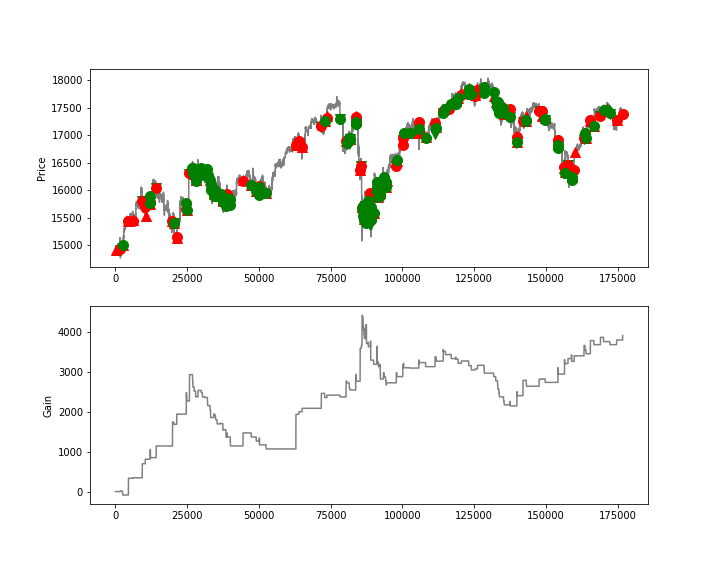

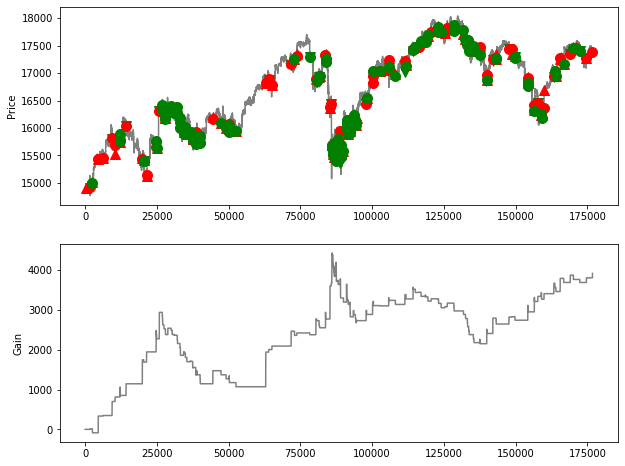

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.close('all')
fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Price')
df_future['close'].plot(ax=ax1, color='gray', figsize=(10,8))
ax1.plot(df_future.loc[df_future['持倉'] == '1'].index,df_future['close'][df_future['持倉'] == '1'],'^', markersize=10, color='r')
ax1.plot(df_future.loc[df_future['持倉'] == '-1'].index,df_future['close'][df_future['持倉'] == '-1'],'v', markersize=10, color='g')
ax1.plot(df_future.loc[df_future['持倉'] == '+0'].index,df_future['close'][df_future['持倉'] == '+0'],'o', markersize=10, color='r')
ax1.plot(df_future.loc[df_future['持倉'] == '-0'].index,df_future['close'][df_future['持倉'] == '-0'],'o', markersize=10, color='g')

ax2 = fig.add_subplot(212, ylabel='Gain')
df_future['總交易損益'].plot(ax=ax2, color='gray', figsize=(10,8))
fig.savefig('./stock1.png')
from IPython.display import Image
Image('./stock1.png')